# END TO END MACHINE LEARNING PROJECT EXAMPLE

## Most of the time there are 8 steps you'll usually go through in ML
## 1. Look at the big Picture
## 2. Get the Data
## 3. Discover and Visusalise the data to get insights
## 4. Prepare the data for machine learning algorithm
## 5. Select a Model and train it
## 6. Fine Tune Your model
## 7. Present Your solution
## 8. Launch Monitor and maintain your system|

#### 

## Popular open data repositories
UC Irvine Machine Learning Repository

Kaggle datasets

Amazon’s AWS datasets

## Meta portals (they list open data repositories) Data Portal


 OpenDataMonit
    
 ndl

##  Other pages listing many popular open data repositoriesWikipedia’s list of Machine Learning datasets


Quora.co


The datasets subreditdditndl

# Before You begin any data science project you need to understand what the objective is

In [1]:
# For file manipulation 
from pathlib import Path

import pandas as pd
# For .tar files

import tarfile
# For getting infomation from the web through http(dowmload files)

import urllib.request 

In [2]:
def housing_data():
    # This takes into account the file path end
    path = Path('datasets/housing.tgz')

    # The condition if it isnt a file
    if not path.is_file():
        # This checks if its the parent and if it exist
        Path('datasets').mkdir(parents=True, exist_ok=True)

        url = 'https://github.com/ageron/data/raw/main/housing.tgz'
        urllib.request.urlretrive(url, path)

        with tarfile.open(path) as housing_tar:
            housing_tar.extractall(path='datasets')

    return pd.read_csv(Path('datasets/housing/housing.csv'))

housing_d = housing_data()
"""
The function checks if the file datasets/housing.tgz exists.
If the file doesn't exist, it downloads it from the provided URL.
It then extracts the contents of the .tgz file into the datasets/housing/ directory.
After extraction, the function reads the CSV file (housing.csv) into a pandas DataFrame and returns it.
"""

"\nThe function checks if the file datasets/housing.tgz exists.\nIf the file doesn't exist, it downloads it from the provided URL.\nIt then extracts the contents of the .tgz file into the datasets/housing/ directory.\nAfter extraction, the function reads the CSV file (housing.csv) into a pandas DataFrame and returns it.\n"

In [3]:
housing_d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_d.info()
"""
The 
info()
method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number of
nonnull values 
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


'\nThe \ninfo()\nmethod is useful to get a quick description of the data, in\nparticular the total number of rows, each attribute’s type, and the number of\nnonnull values \n'

In [5]:
housing_d['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing_d.describe() # For numerical description of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


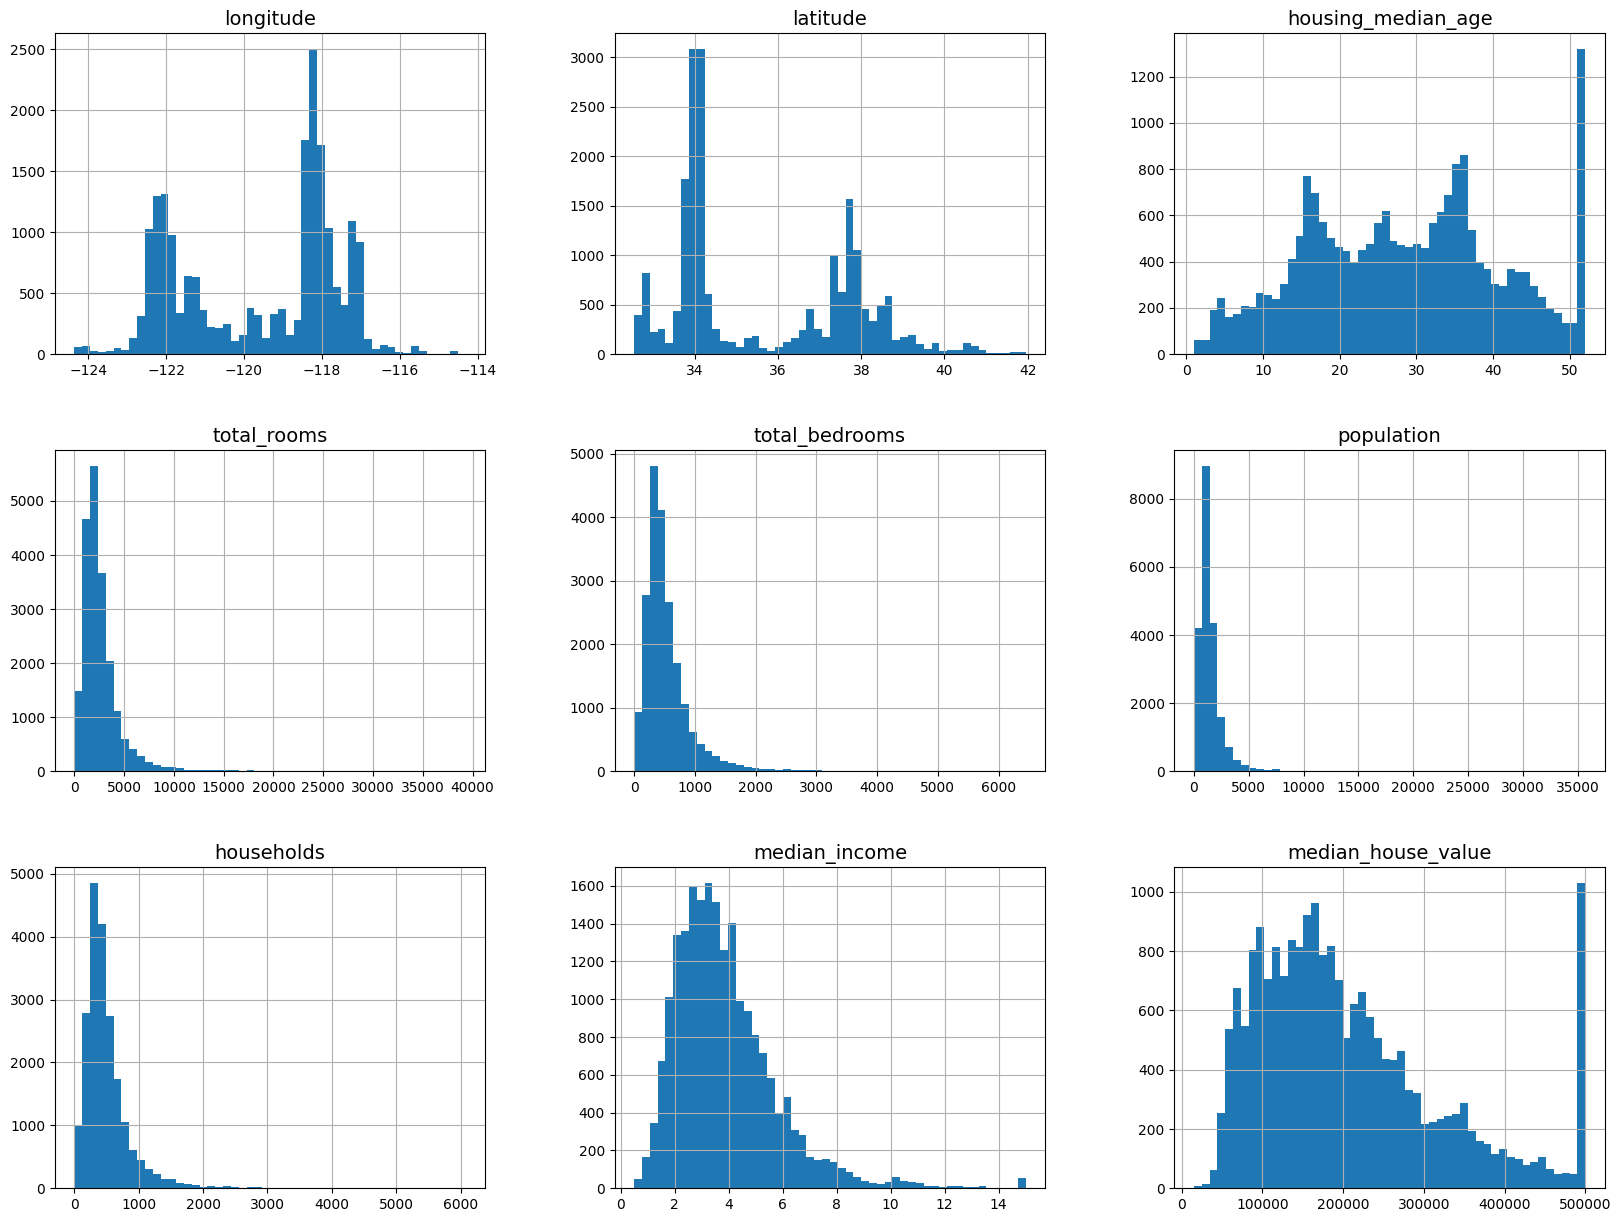

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
# Not necessary just for specification
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Very necessary
housing_d.hist(figsize=(20, 15), bins=50)
plt.show()

# Its important to understand how the data was computed for isntance, the housing median income was scaled at 
# Many histograms are tail heavy as they extend much father to the right of the median  

In [ ]:
# Creating a test set of the data you can use sklearn.model selection import train_test_split if you are familiar with it

import numpy as np

 def train_test(data, test_ratio):
     shuffled_indecies = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indicies = shuffled_indecies[:test_size]
     train_indicies = shuffled_indicies[test_size:]
     return data.iloc[train_inicies],  